In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("diabetes.csv")

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.columns=["preg","glu","bp","st","ins","bmi","dpf","age","ot"]

In [5]:
data.head()

,preg,glu,bp,st,ins,bmi,dpf,age,ot
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
data.describe()

,preg,glu,bp,st,ins,bmi,dpf,age,ot
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    int64  
 1   glu     768 non-null    int64  
 2   bp      768 non-null    int64  
 3   st      768 non-null    int64  
 4   ins     768 non-null    int64  
 5   bmi     768 non-null    float64
 6   dpf     768 non-null    float64
 7   age     768 non-null    int64  
 8   ot      768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [10]:
from sklearn import metrics

In [11]:
data[-data.applymap(np.isreal).all(1)]

,preg,glu,bp,st,ins,bmi,dpf,age,ot


In [12]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
preg,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
glu,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
bp,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
st,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
ins,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
bmi,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
dpf,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
ot,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [13]:
data.groupby(["ot"]).count()

,preg,glu,bp,st,ins,bmi,dpf,age
ot,,,,,,,,
0,500,500,500,500,500,500,500,500
1,268,268,268,268,268,268,268,268


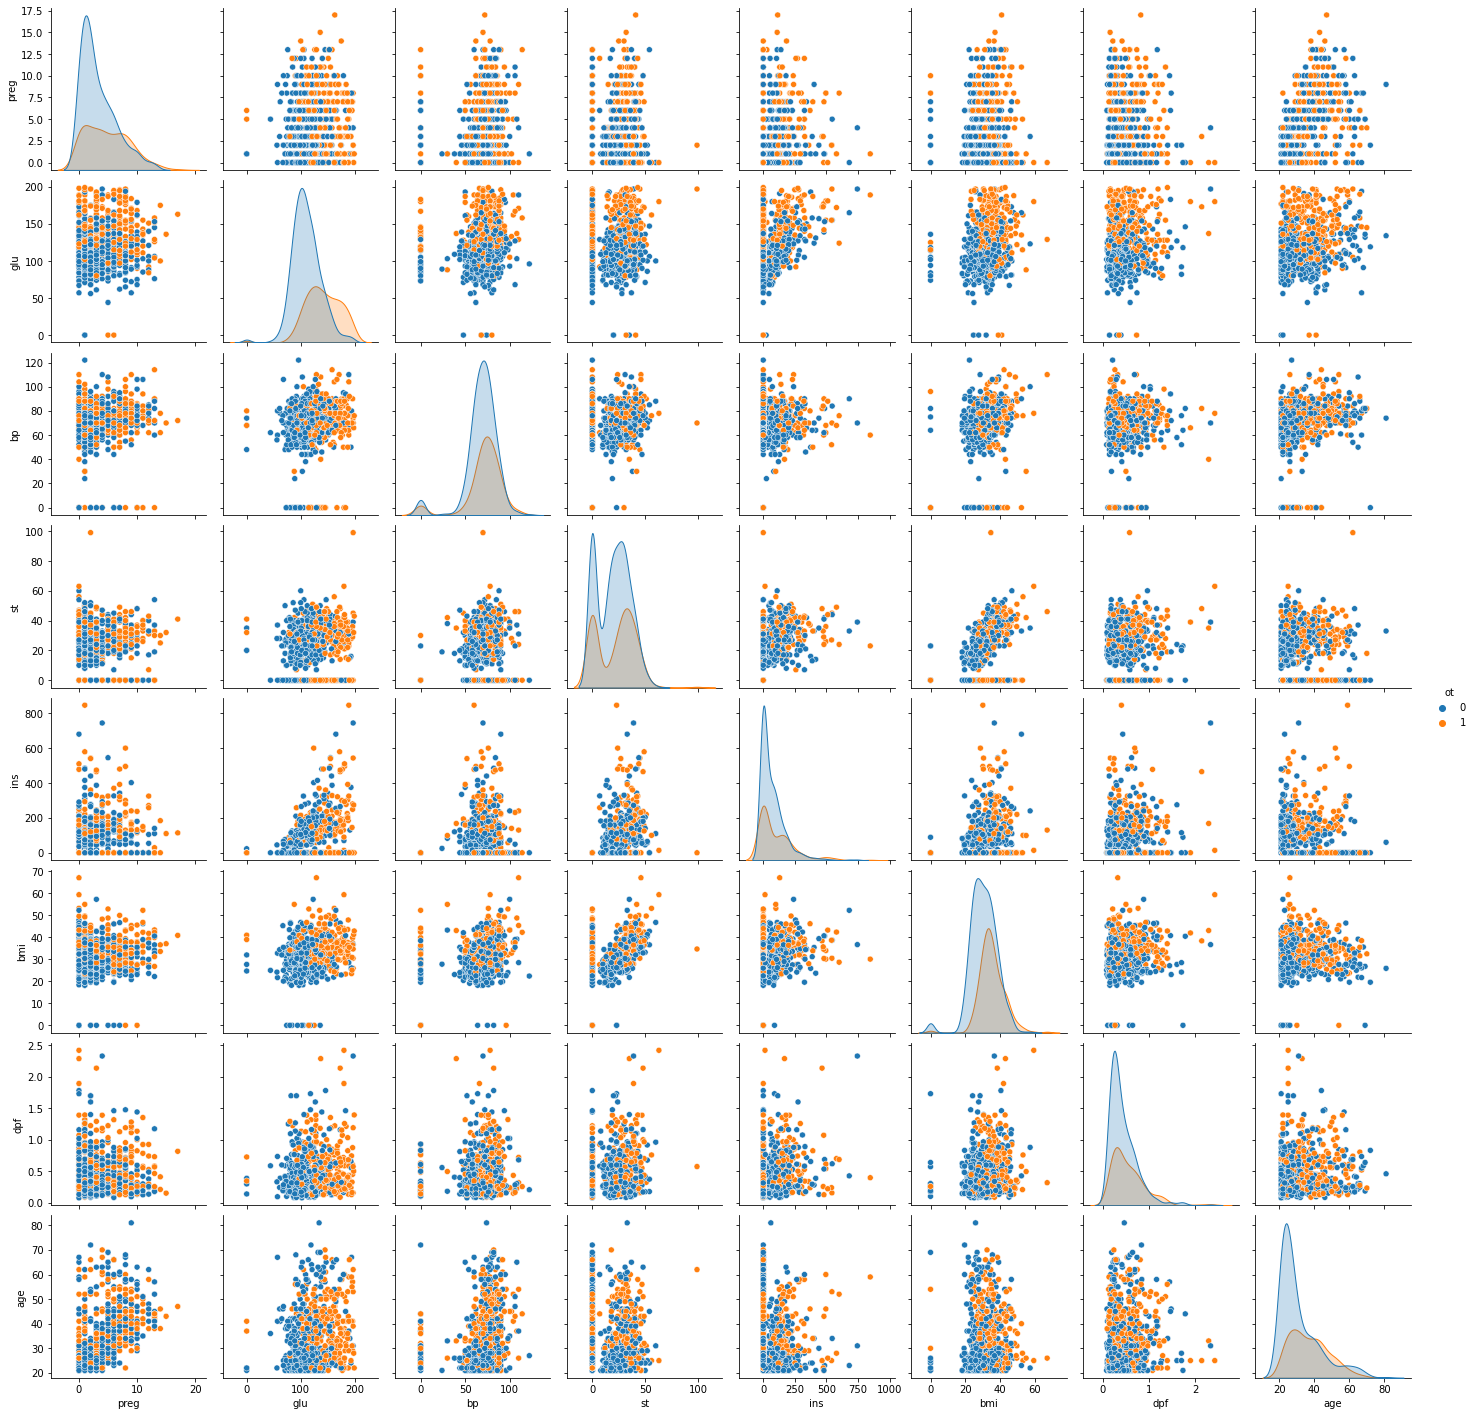

In [16]:
sns.pairplot(data,diag_kind="kde",hue="ot")
plt.show()

In [18]:
array=data.values
x=array[:,0:7]
y=array[:,8]
test_size=0.30
seed=7

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30)

In [19]:
model=LogesticRegression()

NameError: name 'LogesticRegression' is not defined

In [22]:
from sklearn.linear_model import LogisticRegression

In [24]:
model=LogisticRegression()

In [27]:
model.fit(x_train,y_train)

C:\Users\jeet computer\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [28]:
y_pred=model.predict(x_test)

In [29]:
print(metrics.confusion_matrix(y_test,y_pred))

[[130  15]
 [ 40  46]]


In [30]:
(130+46)/(130+46+40+46)

0.6717557251908397